# Διακριτός Μετασχηματισμός Συνημιτόνου (Discrete Cosine Transform)

Κάθε σήμα μπορεί να αναπαρασταθεί ως ένα άθροισμα συνημιτονοειδών σημάτων, όπου κάθε ένα από αυτά έχει διαφορετική φάση και πλάτος.

$$G(m,n)=\frac{2}{\sqrt{MN}}\sum_{u=0}^{M-1}\sum_{v=0}^{N-1} g(u,v)c_m cos({\frac{π(2u+1)m}{2M})}cos({\frac{π(2v+1)n}{2Ν})}\;(4)$$ 

Η σύνθεση των επιμέρους συνημιτονοειδών σημάτων μπορεί να μας δώσει το αρχικό σήμα.


$$g(u,v)=\frac{2}{\sqrt{MN}}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1} G(m,n)c_m cos({\frac{π(2u+1)m}{2M})}cos({\frac{π(2v+1)n}{2Ν})}\;(5)$$ 


Παρόμοιος με Discrete Fourier Transform, αλλά

> Χρησιμοποιεί μόνο πραγματικούς αριθμούς

> Αποσυνθέτει μία συνάρτηση σε μια σειρά περιττών συνημιτονοειδών στοιχείων μόνο

> Διαφορετικές τάξεις συντελεστών

**Υπολογιστικά φθηνότερος από DFT, ευρεία χρήση**

**Η DC συνιστώσα αντιστοιχεί στη μέση φωτεινότητα της εικόνας**

 ![Σχήμα 4](https://drive.google.com/uc?id=15LfBy5s3zUQ8fR9Wpm-mgX981aALNe5w)
 ![Σχήμα 5](https://drive.google.com/uc?id=1DCBbXIBWe4NLl-zOx-MU3i5aFRWvEspb)

 $$a_{ik}=a_i\cdot cos\frac{π(2k+1)i}{2N} $$ 
 για $$ i,k=0,...,N-1,  \:\:   a_0=\sqrt\frac{1}{N},  \:\: a_i=\sqrt\frac{2}{N}   \:\: \forall i \neq 0$$


In [ ]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from skimage import data, img_as_float
from scipy.fftpack import dct,idct
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray
from scipy import ndimage
from numpy import r_


def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


### Εφαρμογή DCT σε ασπρόμαυρες εικόνες

Text(0.5, 1.0, 'DCT of A2d')

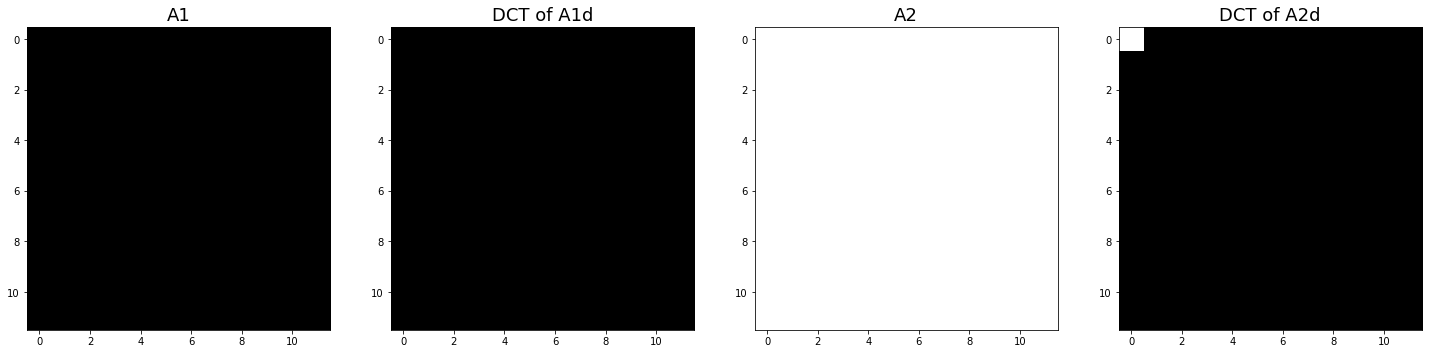

In [ ]:
A1=np.zeros((12,12))
A1d=dct2(A1)

A2=np.ones((12,12))
A2d=dct2(A2)

f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(25, 15))

ax0.imshow(A1, interpolation='bilinear', cmap='gray')

ax0.set_title('A1', fontsize=18)

ax1.imshow(A1d,cmap='gray')
ax1.set_title('DCT of A1d', fontsize=18)

ax2.imshow(A2, alpha=0)
ax2.set_title('A2', fontsize=18)

ax3.imshow(A2d,cmap='gray')
ax3.set_title('DCT of A2d', fontsize=18)



Text(0.5, 1.0, 'DCT of D')

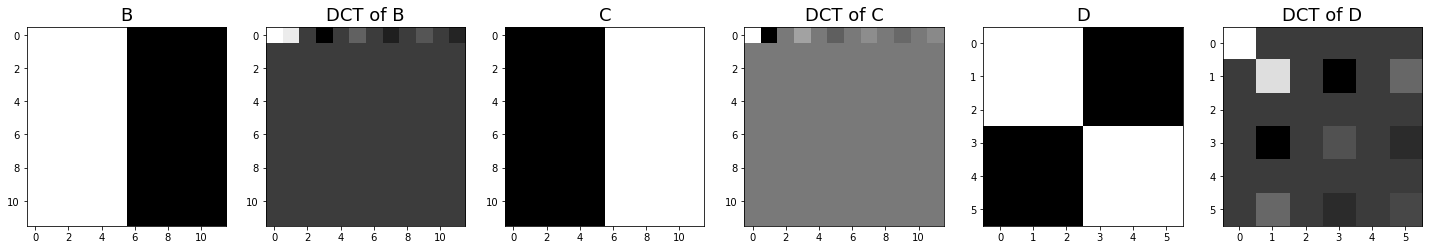

In [ ]:
B=np.concatenate((np.ones((12,6)), np.zeros((12,6))), axis=1)
B1=dct2(B)

C=np.concatenate((np.zeros((12,6)), np.ones((12,6))), axis=1)
C1=dct2(C)

D1=np.concatenate((np.ones((3,3)), np.zeros((3,3))), axis=0)
D2=np.concatenate((np.zeros((3,3)), np.ones((3,3))), axis=0)
D=np.concatenate((D1, D2), axis=1)
D3=dct2(D)

f, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 6, figsize=(25, 15))

ax0.imshow(B,cmap='gray')
ax0.set_title('B', fontsize=18)

ax1.imshow(B1,cmap='gray')
ax1.set_title('DCT of B', fontsize=18)


ax2.imshow(C,cmap='gray')
ax2.set_title('C', fontsize=18)

ax3.imshow(C1,cmap='gray')
ax3.set_title('DCT of C', fontsize=18)

ax4.imshow(D,cmap='gray')
ax4.set_title('D', fontsize=18)

ax5.imshow(D3,cmap='gray')
ax5.set_title('DCT of D', fontsize=18)


# Εφαρμογή των μετασχηματισμών DCT σε ολόκληρη την εικόνα

In [ ]:
im=data.camera()
height=im.shape[0]
width=im.shape[1]

# Apply  DCT to image
im_dct=dct2(im)
idct_im=idct2(im_dct)


Text(0.5, 1.0, 'Image DCT zoom upper right corner')

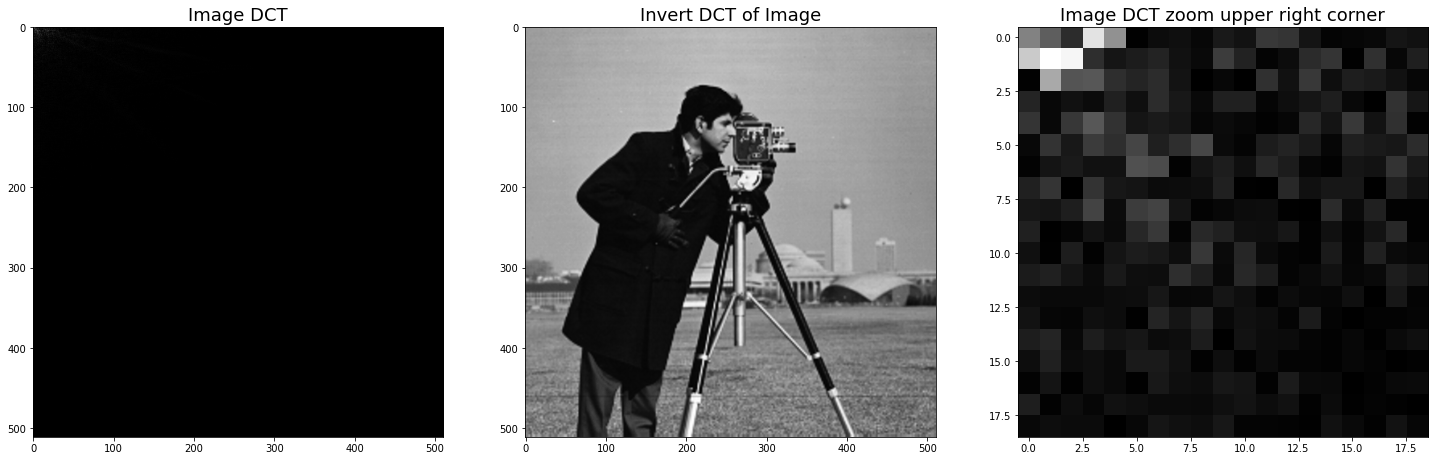

In [ ]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25, 15))

ax0.imshow(abs(im_dct[1:height,1:width]),cmap='gray')
ax0.set_title('Image DCT', fontsize=18)

ax1.imshow(abs(idct_im[1:height,1:width]),cmap='gray')
ax1.set_title('Invert DCT of Image', fontsize=18)

ax2.imshow(abs(im_dct[1:20,1:20]),cmap='gray')
ax2.set_title('Image DCT zoom upper right corner', fontsize=18)

